Import necessary libraries:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.optimize

Utility functions for processing data and drawing graphs:

In [2]:
def concurrent_reqs(row, df):
    x = (df['end'] < row['start']) | (df['start'] > row['end'])
    return (~x).values.sum()

def add_concurrent_and_latency(df):
    df['concurrent'] = df.apply(lambda row: concurrent_reqs(row, df), axis=1)
    df['latency'] = df.apply(lambda row: row['end'] - row['start'], axis=1)
    return df

def extract_stats(df):
    stats = df.groupby(['concurrent'])['latency'].agg(['mean', 'count', 'std'])
    stats['std'] = stats['std'].fillna(0)
    stats['error_bar'] = stats['std']
    stats = stats.reset_index()
    stats['x'] = stats['concurrent']
    stats['y'] = stats['mean']
    stats['yerr'] = stats['error_bar']
    return stats[['x', 'y', 'yerr', 'count']]

def plot_graph(data, title, curve=True):
    x = data['x']
    y = data['y']
    yerr = data['yerr']
    count = np.sum(data['count'])
    plt.scatter(x,y)
    plt.errorbar(x,y, yerr=yerr, fmt="o")
    
    line = np.polyfit(x,y,2 if curve else 1)
    plt.plot(np.unique(x), np.poly1d(line)(np.unique(x)))
    plt.title(title)
    plt.xlabel('Concurrent Active Requests')
    plt.ylabel('Mean Latency (ms)')
    line = np.round(line, 3)
    equation = ""
    if curve:
        equation = "y = "+str(line[0])+"x^2 + "+str(line[1])+"x + "+str(line[2])
    else:
        equation = "y = "+str(line[0])+"x + "+str(line[1])
    plt.show()
    print(equation)
    print("Data Points="+str(count))

Function to plot verifier latency graph from csv files:

In [3]:
def plot_verifier_latency(logs_dir, title):
    csvFiles = [logs_dir+"/"+x+"/verifier_timings.csv" for x in os.listdir(logs_dir) if x.startswith("verifier_")]
    dfs = [pd.read_csv(csv) for csv in csvFiles]
    df = pd.concat(dfs)
    df = add_concurrent_and_latency(df)
    stats = extract_stats(df)
    plot_graph(stats, title + "- Verifier Latency")

Function to plot prover latency graphs from csv files:

In [4]:
def process_subject_req_data(df):
    _df = df[['start','responded_to_subject_req']].copy()
    _df['end'] = _df['responded_to_subject_req']
    _df = add_concurrent_and_latency(_df)
    return _df

def process_cred_req_data(df):
    _df = df[['received_creds_req','responded_to_creds_req']].copy()
    _df['start'] = _df['received_creds_req']
    _df['end'] = _df['responded_to_creds_req']
    _df = add_concurrent_and_latency(_df)
    return _df

def plot_prover_latency(logs_dir, title):
    csvFiles = [logs_dir+"/"+x+"/prover_timings.csv" for x in os.listdir(logs_dir) if x.startswith("user_")]
    dfs = [pd.read_csv(csv) for csv in csvFiles]
    dfs1 = [process_subject_req_data(df) for df in dfs]
    df1 = pd.concat(dfs1)
    dfs2 = [process_cred_req_data(df) for df in dfs]
    df2 = pd.concat(dfs2)
    stats1 = extract_stats(df1)
    stats2 = extract_stats(df2)
    plot_graph(stats1, title + " - Prover Latency (Subjects)", False)
    plot_graph(stats2, title + " - Prover Latency (Credentials)", False)

Function to plot both verifier and prover graphs for a set of logs:

In [5]:
def plot_graphs(logs_dir, title):
    plot_verifier_latency(logs_dir, title)
    plot_prover_latency(logs_dir, title)

Call functions to plot all graphs:

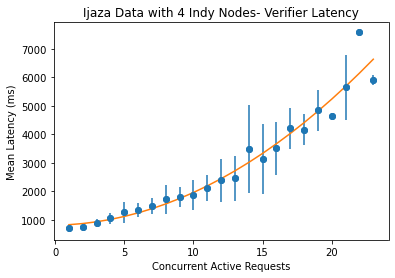

y = 10.635x^2 + 8.325x + 813.247
Data Points=1254


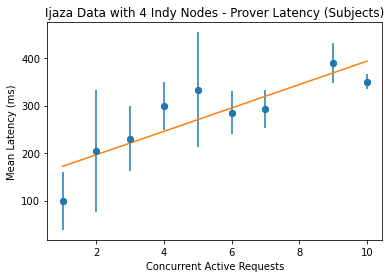

y = 24.597x + 147.486
Data Points=1254


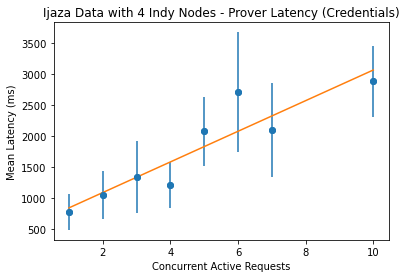

y = 247.022x + 594.992
Data Points=1254


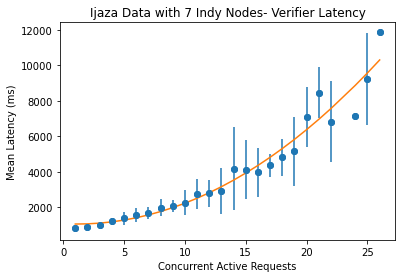

y = 14.959x^2 + -34.23x + 1081.34
Data Points=1254


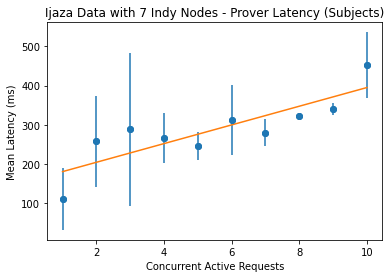

y = 23.805x + 156.985
Data Points=1254


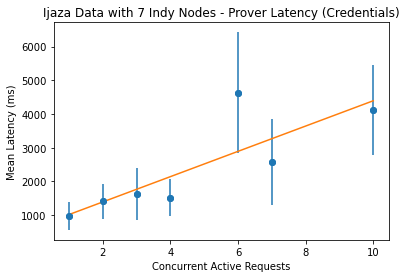

y = 375.37x + 638.358
Data Points=1254


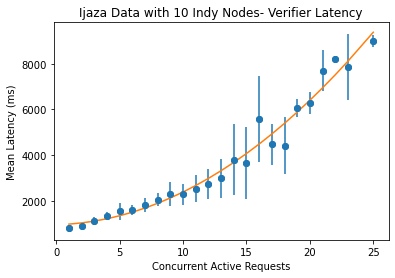

y = 12.907x^2 + 13.969x + 958.47
Data Points=1254


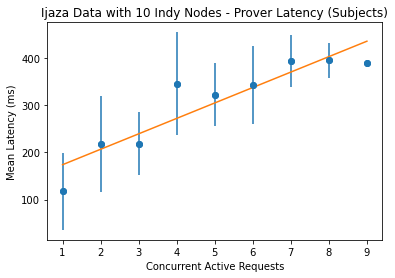

y = 32.727x + 141.061
Data Points=1254


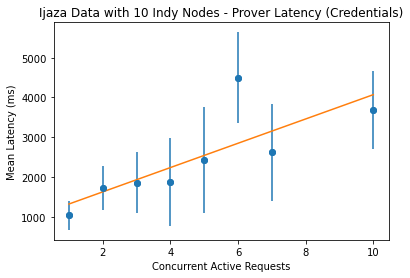

y = 305.281x + 1017.602
Data Points=1254


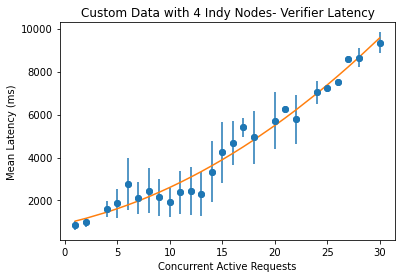

y = 5.997x^2 + 107.999x + 927.763
Data Points=396


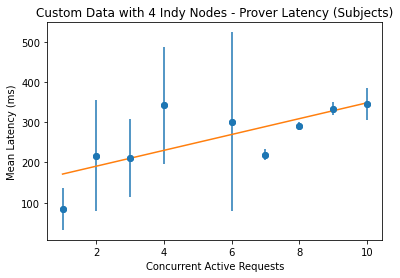

y = 19.685x + 151.52
Data Points=396


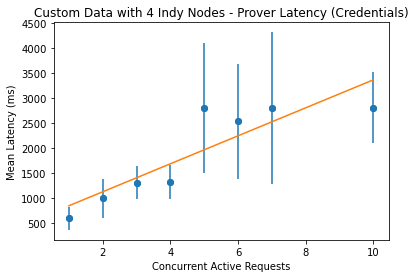

y = 279.978x + 570.852
Data Points=396


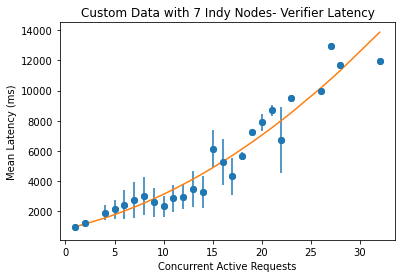

y = 8.032x^2 + 150.544x + 821.014
Data Points=396


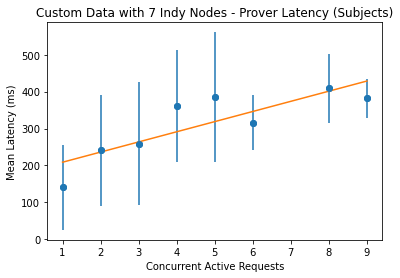

y = 27.496x + 181.28
Data Points=396


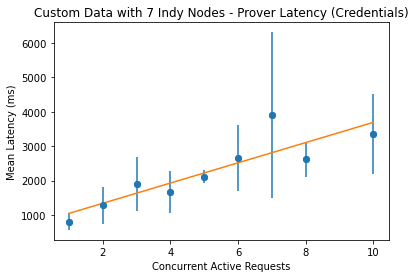

y = 294.097x + 752.208
Data Points=396


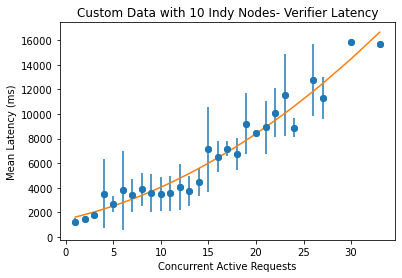

y = 8.7x^2 + 174.857x + 1421.048
Data Points=396


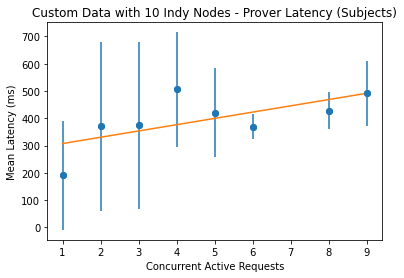

y = 23.055x + 284.449
Data Points=396


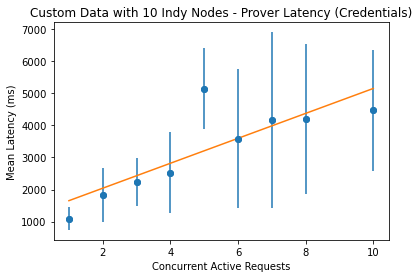

y = 389.1x + 1263.534
Data Points=396


In [6]:
plot_graphs("./ijaza-4_indy_nodes", "Ijaza Data with 4 Indy Nodes")
plot_graphs("./ijaza-7_indy_nodes", "Ijaza Data with 7 Indy Nodes")
plot_graphs("./ijaza-10_indy_nodes", "Ijaza Data with 10 Indy Nodes")
plot_graphs("./custom-4_indy_nodes", "Custom Data with 4 Indy Nodes")
plot_graphs("./custom-7_indy_nodes", "Custom Data with 7 Indy Nodes")
plot_graphs("./custom-10_indy_nodes", "Custom Data with 10 Indy Nodes")